In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


C:\Users\alvar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

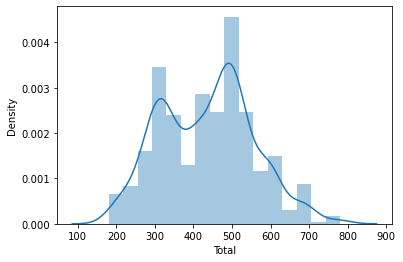

In [5]:
sns.distplot(df['Total'])

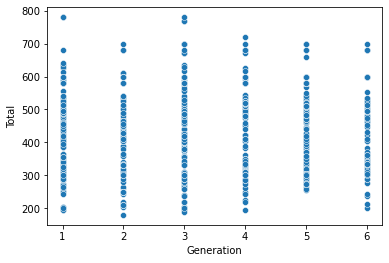

In [152]:
sns.scatterplot(x = 'Generation', y = 'Total', data = df)
plt.show()

In [153]:
#Quitamos los legendarios

df_legendarios = df[df['Legendary'] == True]
df.drop(df_legendarios.index, axis = 0, inplace = True)

In [154]:
#Quitamos los mega

df_megas = df.query('Name.str.contains("Mega ")')
df.drop(df_megas.index, axis = 0, inplace = True)

In [155]:
pd.__version__

'1.4.2'

In [156]:
#No tienen evolucion en su generacion

lista_no_evolucion = []
for i in range(df.iloc[1:].shape[0]):
    if (df.iloc[i]['Type 1'] != df.iloc[i-1]['Type 1']) and (df.iloc[i]['Type 1'] != df.iloc[i+1]['Type 1']):
        if (df.iloc[i]['Name'][0] != df.iloc[i-1]['Name'][0]) and (df.iloc[i]['Name'][0] != df.iloc[i+1]['Name'][0]):
            if not df.iloc[i]['Name'].endswith('eon'):
                lista_no_evolucion.append(df.iloc[i]['#'])
df_no_ev = df[df['#'].isin(lista_no_evolucion)]
df.drop(df[df['#'].isin(lista_no_evolucion)].index, axis = 0, inplace = True)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


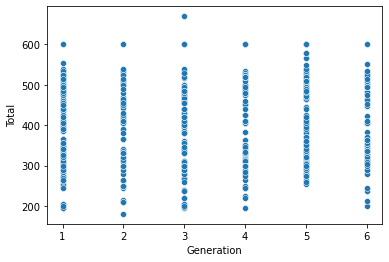

In [157]:
sns.scatterplot(x = 'Generation', y = 'Total', data = df)
plt.show()

In [158]:
predicciones = []
for i in range(1,7):
    centroides = np.array([[250,i],
                           [400,i],
                           [550,i]])
    kmeans = KMeans(n_clusters=3, init = centroides).fit_predict(df[df['Generation'] == i][['Total','Generation']])
    predicciones.extend(list(kmeans))
predicciones

C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing 

[0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,


In [159]:
df['Evolucion'] = predicciones
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolucion
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,2
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False,2
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False,0
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,2
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,0


In [160]:
df_legendarios['Evolucion'] = -1
df_legendarios

C:\Users\alvar\AppData\Local\Temp\ipykernel_4340\1462892578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_legendarios['Evolucion'] = -1


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolucion
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,-1
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,-1
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,-1
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,-1
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,-1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,-1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,-1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,-1


In [161]:
df_megas['Evolucion'] = -2
df_megas

C:\Users\alvar\AppData\Local\Temp\ipykernel_4340\3452429614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_megas['Evolucion'] = -2


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolucion
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,-2
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,-2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,-2
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,-2
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,-2
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False,-2
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False,-2
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False,-2
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False,-2
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False,-2


In [162]:
df_no_ev['Evolucion'] = -3
df_no_ev

C:\Users\alvar\AppData\Local\Temp\ipykernel_4340\214741894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_ev['Evolucion'] = -3


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolucion
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False,-3
116,108,Lickitung,Normal,NaN,385,90,55,75,60,75,30,1,False,-3
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,-3
122,114,Tangela,Grass,NaN,435,65,55,115,100,40,60,1,False,-3
123,115,Kangaskhan,Normal,NaN,490,105,95,80,40,80,90,1,False,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,676,Furfrou,Normal,NaN,472,75,80,60,65,90,102,6,False,-3
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False,-3
772,702,Dedenne,Electric,Fairy,431,67,58,57,81,67,101,6,False,-3
773,703,Carbink,Rock,Fairy,500,50,50,150,50,150,50,6,False,-3


In [163]:
df_resultado = pd.concat([df,df_legendarios,df_megas,df_no_ev], axis = 0).sort_values('#')
df_resultado

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolucion
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,-2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,2
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,-1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,-1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,-1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,-1


# CONCLUSIONES FINALES:

### Se han creado los grupos buscando la fase de la evolucion del pokemon segun la generacion

- El grupo 0 te dice si el pokemon esta en la evolucion inicial
- El grupo 1 te dice si el pokemon esta en la evolucion intermedia(si tiene evolucion intermedia)
- El grupo 2 te dice si el pokemon esta en la evolucion final
- El grupo -1 te dice si el pokemon es legendario (los legendarios no tienen evolucion)
- El grupo -2 te dice si el pokemon es mega (son un tipo especial de pokemon, no se les puede considerar que tengan evolucion)
- El grupo -3 te dice que el pokemon directamente no tiene ninguna evolucion ni puede llegar a evolucionar